## Regression Analysis for Placement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
data1=pd.read_csv("C:/Users/Richa/Desktop/rawData1.csv")
data2=data1.copy()

In [4]:
data2.drop(["sl_no","salary"], axis=1, inplace=True)

In [5]:
data2.head()

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,etest_p,mba_p,Male?,Placed?,Experience?,HSCentralBoard?,SpecialisationInHR?,SSCentralBoard?
0,67.00,91.00,1,58.00,2,55.0,58.80,1.0,1.0,0.0,0.0,1.0,0.0
1,79.33,78.33,2,77.48,2,86.5,66.28,1.0,1.0,1.0,0.0,0.0,1.0
2,65.00,68.00,0,64.00,0,75.0,57.80,1.0,1.0,0.0,1.0,0.0,1.0
3,56.00,52.00,2,52.00,2,66.0,59.43,1.0,0.0,0.0,1.0,1.0,1.0
4,85.80,73.60,1,73.30,0,96.8,55.50,1.0,1.0,0.0,1.0,0.0,1.0


In [6]:
x2=data2.drop("Placed?",axis=1)
y2=data2['Placed?']

In [7]:
column_names = x2.columns.values

In [8]:
#Scalizing between 0-1 (Normalization)
x2_scaled = MinMaxScaler().fit_transform(x2)

#### 1. Determining Least Significant Variable by R2 Score

In [9]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


In [10]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

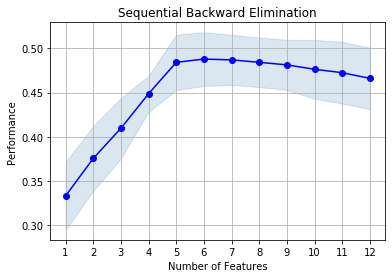

In [11]:
linreg = LinearRegression()
sfs = SFS(linreg, k_features=1, forward=False, scoring='r2',cv=10)
sfs = sfs.fit(x2_scaled, y2)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Backward Elimination')
plt.grid()
plt.show()

###### Lets see the top 5 most significant features

In [12]:
top_n = 5
sfs.get_metric_dict()[top_n]

{'feature_idx': (0, 1, 3, 6, 8),
 'cv_scores': array([0.38745021, 0.54401845, 0.44077837, 0.33114989, 0.57567287,
        0.48312706, 0.63879949, 0.46329752, 0.3948886 , 0.58193054]),
 'avg_score': 0.4841112998192629,
 'feature_names': ('0', '1', '3', '6', '8'),
 'ci_bound': 0.06986343473229474,
 'std_dev': 0.09406518988349936,
 'std_err': 0.03135506329449979}

In [13]:
#Top N Features
top_n_indices = list(sfs.get_metric_dict()[top_n]['feature_idx'])
print(f"Most Significant {top_n} Features:")
for col in column_names[top_n_indices]:
    print(col)

Most Significant 5 Features:
ssc_p
hsc_p
degree_p
mba_p
Experience?


#### 2. Determining Least Significant Variable by P-Value

In [14]:
#Converting to DF for as  column names gives readibility
x2_scaled = pd.DataFrame(x2_scaled, columns=column_names)
y2 = y2.values

# We must add a constants 1s for intercept before doing Linear Regression with statsmodel
x2_scaled = sm.add_constant(x2_scaled)
x2_scaled.head()
#Constants 1 added for intercept term

,const,ssc_p,hsc_p,hsc_s,degree_p,degree_t,etest_p,mba_p,Male?,Experience?,HSCentralBoard?,SpecialisationInHR?,SSCentralBoard?
0,1.0,0.538240,0.889621,0.5,0.195122,1.0,0.104167,0.284483,1.0,0.0,0.0,1.0,0.0
1,1.0,0.792414,0.680890,1.0,0.670244,1.0,0.760417,0.564843,1.0,1.0,0.0,0.0,1.0
2,1.0,0.497011,0.510708,0.0,0.341463,0.0,0.520833,0.247001,1.0,0.0,1.0,0.0,1.0
3,1.0,0.311482,0.247117,1.0,0.048780,1.0,0.333333,0.308096,1.0,0.0,1.0,1.0,1.0
4,1.0,0.925788,0.602965,0.5,0.568293,0.0,0.975000,0.160795,1.0,0.0,1.0,0.0,1.0


In [15]:
model2 = sm.OLS(y2, x2_scaled)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     21.03
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           1.56e-29
Time:                        00:47:15   Log-Likelihood:                -52.459
No. Observations:                 215   AIC:                             130.9
Df Residuals:                     202   BIC:                             174.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1388      0.111     -1.253      0.212      -0.357       0.080
ssc_p                   0.9627      0.138      6.975      0.000       0.691       1.235
hsc_p                   0.5828      0.165      3.525      0.001       0.257       0.909
hsc_s                   0.0345      0.104      0.332      0.740      -0.171       0.240
degree_p                0.6283      0.155      4.043      0.000       0.322       0.935
degree_t               -0.1257      0.063     -1.997      0.047      -0.250      -0.002
etest_p                -0.1224      0.086     -1.426      0.155      -0.291       0.047
mba_p                  -0.5615      0.122     -4.615      0.000      -0.801      -0.322
Male?                   0.0801      0.050      1.592      0.113      -0.019       0.179
Experience?             0.1773      0.048      3.661      0.000       0.082       0.273
HSCentralBoard?         0.0480      0.058      0.822      0.412      -0.067       0.163
SpecialisationInHR?    -0.0511      0.048     -1.055      0.293      -0.147       0.044
SSCentralBoard?        -0.0654      0.059     -1.112      0.267      -0.181       0.051
==============================================================================
Omnibus:                        2.860   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.442
Skew:                          -0.156   Prob(JB):                        0.295
Kurtosis:                       2.581   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
x2_scaled = x2_scaled.drop('hsc_s', axis=1)
model2 = sm.OLS(y2, x2_scaled)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     23.03
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           3.34e-30
Time:                        00:47:15   Log-Likelihood:                -52.518
No. Observations:                 215   AIC:                             129.0
Df Residuals:                     203   BIC:                             169.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1221      0.099     -1.239      0.217      -0.316       0.072
ssc_p                   0.9742      0.133      7.303      0.000       0.711       1.237
hsc_p                   0.5667      0.158      3.593      0.000       0.256       0.878
degree_p                0.6354      0.154      4.136      0.000       0.332       0.938
degree_t               -0.1141      0.052     -2.182      0.030      -0.217      -0.011
etest_p                -0.1198      0.085     -1.405      0.162      -0.288       0.048
mba_p                  -0.5635      0.121     -4.647      0.000      -0.803      -0.324
Male?                   0.0814      0.050      1.627      0.105      -0.017       0.180
Experience?             0.1760      0.048      3.655      0.000       0.081       0.271
HSCentralBoard?         0.0438      0.057      0.769      0.443      -0.068       0.156
SpecialisationInHR?    -0.0485      0.048     -1.017      0.310      -0.143       0.046
SSCentralBoard?        -0.0616      0.058     -1.070      0.286      -0.175       0.052
==============================================================================
Omnibus:                        3.005   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                2.532
Skew:                          -0.158   Prob(JB):                        0.282
Kurtosis:                       2.572   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
x2_scaled = x2_scaled.drop('HSCentralBoard?', axis=1)
model2 = sm.OLS(y2, x2_scaled)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     25.32
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           8.56e-31
Time:                        00:47:15   Log-Likelihood:                -52.831
No. Observations:                 215   AIC:                             127.7
Df Residuals:                     204   BIC:                             164.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1097      0.097     -1.129      0.260      -0.301       0.082
ssc_p                   0.9831      0.133      7.406      0.000       0.721       1.245
hsc_p                   0.5574      0.157      3.548      0.000       0.248       0.867
degree_p                0.6283      0.153      4.102      0.000       0.326       0.930
degree_t               -0.1138      0.052     -2.178      0.031      -0.217      -0.011
etest_p                -0.1234      0.085     -1.451      0.148      -0.291       0.044
mba_p                  -0.5666      0.121     -4.680      0.000      -0.805      -0.328
Male?                   0.0783      0.050      1.573      0.117      -0.020       0.177
Experience?             0.1731      0.048      3.609      0.000       0.079       0.268
SpecialisationInHR?    -0.0522      0.047     -1.100      0.272      -0.146       0.041
SSCentralBoard?        -0.0346      0.046     -0.759      0.449      -0.124       0.055
==============================================================================
Omnibus:                        4.163   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                3.122
Skew:                          -0.160   Prob(JB):                        0.210
Kurtosis:                       2.504   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
x2_scaled = x2_scaled.drop('SSCentralBoard?', axis=1)
model2 = sm.OLS(y2, x2_scaled)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     28.13
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           2.06e-31
Time:                        00:47:15   Log-Likelihood:                -53.134
No. Observations:                 215   AIC:                             126.3
Df Residuals:                     205   BIC:                             160.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1264      0.094     -1.338      0.182      -0.313       0.060
ssc_p                   1.0007      0.131      7.663      0.000       0.743       1.258
hsc_p                   0.5290      0.152      3.471      0.001       0.229       0.830
degree_p                0.6287      0.153      4.108      0.000       0.327       0.930
degree_t               -0.1128      0.052     -2.161      0.032      -0.216      -0.010
etest_p                -0.1271      0.085     -1.499      0.135      -0.294       0.040
mba_p                  -0.5560      0.120     -4.628      0.000      -0.793      -0.319
Male?                   0.0809      0.050      1.629      0.105      -0.017       0.179
Experience?             0.1700      0.048      3.561      0.000       0.076       0.264
SpecialisationInHR?    -0.0554      0.047     -1.175      0.241      -0.148       0.038
==============================================================================
Omnibus:                        3.842   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                2.952
Skew:                          -0.157   Prob(JB):                        0.229
Kurtosis:                       2.519   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
x2_scaled = x2_scaled.drop('SpecialisationInHR?', axis=1)
model2 = sm.OLS(y2, x2_scaled)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     31.42
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           6.93e-32
Time:                        00:47:15   Log-Likelihood:                -53.856
No. Observations:                 215   AIC:                             125.7
Df Residuals:                     206   BIC:                             156.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1804      0.083     -2.184      0.030      -0.343      -0.018
ssc_p           1.0008      0.131      7.658      0.000       0.743       1.259
hsc_p           0.5463      0.152      3.598      0.000       0.247       0.846
degree_p        0.6509      0.152      4.283      0.000       0.351       0.951
degree_t       -0.1196      0.052     -2.305      0.022      -0.222      -0.017
etest_p        -0.1111      0.084     -1.326      0.186      -0.276       0.054
mba_p          -0.5569      0.120     -4.632      0.000      -0.794      -0.320
Male?           0.0873      0.049      1.768      0.079      -0.010       0.185
Experience?     0.1788      0.047      3.788      0.000       0.086       0.272
==============================================================================
Omnibus:                        4.536   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                3.192
Skew:                          -0.143   Prob(JB):                        0.203
Kurtosis:                       2.477   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
x2_scaled = x2_scaled.drop('etest_p', axis=1)
model2 = sm.OLS(y2, x2_scaled)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     35.52
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           2.62e-32
Time:                        00:47:15   Log-Likelihood:                -54.770
No. Observations:                 215   AIC:                             125.5
Df Residuals:                     207   BIC:                             152.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1939      0.082     -2.361      0.019      -0.356      -0.032
ssc_p           0.9823      0.130      7.545      0.000       0.726       1.239
hsc_p           0.5315      0.152      3.503      0.001       0.232       0.831
degree_p        0.6364      0.152      4.190      0.000       0.337       0.936
degree_t       -0.1168      0.052     -2.248      0.026      -0.219      -0.014
mba_p          -0.5792      0.119     -4.857      0.000      -0.814      -0.344
Male?           0.0769      0.049      1.574      0.117      -0.019       0.173
Experience?     0.1804      0.047      3.817      0.000       0.087       0.274
==============================================================================
Omnibus:                        5.255   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                3.309
Skew:                          -0.109   Prob(JB):                        0.191
Kurtosis:                       2.433   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
x2_scaled = x2_scaled.drop('Male?', axis=1)
model2 = sm.OLS(y2, x2_scaled)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     40.74
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           1.31e-32
Time:                        00:47:15   Log-Likelihood:                -56.049
No. Observations:                 215   AIC:                             126.1
Df Residuals:                     208   BIC:                             149.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1311      0.072     -1.820      0.070      -0.273       0.011
ssc_p           0.9854      0.131      7.543      0.000       0.728       1.243
hsc_p           0.5597      0.151      3.702      0.000       0.262       0.858
degree_p        0.6095      0.151      4.025      0.000       0.311       0.908
degree_t       -0.1080      0.052     -2.083      0.038      -0.210      -0.006
mba_p          -0.6361      0.114     -5.576      0.000      -0.861      -0.411
Experience?     0.1900      0.047      4.040      0.000       0.097       0.283
==============================================================================
Omnibus:                        3.838   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                2.731
Skew:                          -0.112   Prob(JB):                        0.255
Kurtosis:                       2.496   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
x2_scaled = x2_scaled.drop('degree_t', axis=1)
model2 = sm.OLS(y2, x2_scaled)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     47.26
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           1.49e-32
Time:                        00:47:15   Log-Likelihood:                -58.269
No. Observations:                 215   AIC:                             128.5
Df Residuals:                     209   BIC:                             148.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1542      0.072     -2.149      0.033      -0.296      -0.013
ssc_p           0.9193      0.128      7.197      0.000       0.668       1.171
hsc_p           0.6352      0.148      4.293      0.000       0.343       0.927
degree_p        0.6117      0.153      4.007      0.000       0.311       0.913
mba_p          -0.6553      0.115     -5.718      0.000      -0.881      -0.429
Experience?     0.1822      0.047      3.855      0.000       0.089       0.275
==============================================================================
Omnibus:                        4.995   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                3.641
Skew:                          -0.183   Prob(JB):                        0.162
Kurtosis:                       2.477   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Thus, Top 6 Features affecting salary we identified are ssc_p, hsc_p, degree_p, mba_p, and Experience?

## A. Multicollinearity

In [23]:
data_2=data2[['ssc_p','hsc_p','degree_p','mba_p','Experience?','Placed?']]
data_2.head()

,ssc_p,hsc_p,degree_p,mba_p,Experience?,Placed?
0,67.00,91.00,58.00,58.80,0.0,1.0
1,79.33,78.33,77.48,66.28,1.0,1.0
2,65.00,68.00,64.00,57.80,0.0,1.0
3,56.00,52.00,52.00,59.43,0.0,0.0
4,85.80,73.60,73.30,55.50,0.0,1.0


In [24]:
corr=data_2.corr()
corr

,ssc_p,hsc_p,degree_p,mba_p,Experience?,Placed?
ssc_p,1.000000,0.511472,0.538404,0.388478,0.175675,0.607889
hsc_p,0.511472,1.000000,0.434206,0.354823,0.141025,0.491228
degree_p,0.538404,0.434206,1.000000,0.402364,0.122648,0.479861
mba_p,0.388478,0.354823,0.402364,1.000000,0.168811,0.076922
Experience?,0.175675,0.141025,0.122648,0.168811,1.000000,0.276060
Placed?,0.607889,0.491228,0.479861,0.076922,0.276060,1.000000


In [25]:
data3=data2[['ssc_p','hsc_p','degree_p','Experience?','Placed?']]
data3.head()

,ssc_p,hsc_p,degree_p,Experience?,Placed?
0,67.00,91.00,58.00,0.0,1.0
1,79.33,78.33,77.48,1.0,1.0
2,65.00,68.00,64.00,0.0,1.0
3,56.00,52.00,52.00,0.0,0.0
4,85.80,73.60,73.30,0.0,1.0


In [26]:
data3.columns = ['ssc_p','hsc_p','degree_p','experience','placed']
data3.head()

,ssc_p,hsc_p,degree_p,experience,placed
0,67.00,91.00,58.00,0.0,1.0
1,79.33,78.33,77.48,1.0,1.0
2,65.00,68.00,64.00,0.0,1.0
3,56.00,52.00,52.00,0.0,0.0
4,85.80,73.60,73.30,0.0,1.0


In [27]:
corr=data3.corr()
corr

,ssc_p,hsc_p,degree_p,experience,placed
ssc_p,1.000000,0.511472,0.538404,0.175675,0.607889
hsc_p,0.511472,1.000000,0.434206,0.141025,0.491228
degree_p,0.538404,0.434206,1.000000,0.122648,0.479861
experience,0.175675,0.141025,0.122648,1.000000,0.276060
placed,0.607889,0.491228,0.479861,0.276060,1.000000


#### Variance Inflation Factor (VIF)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [29]:
from sklearn.model_selection import train_test_split
x3=data3.drop(['placed'],axis=1)
y3=data3['placed']

In [30]:
X = add_constant(x3)
print ("VIF:")
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

VIF:


const         89.690656
ssc_p          1.643131
hsc_p          1.426960
degree_p       1.480042
experience     1.036096
dtype: float64

## B. Outliers

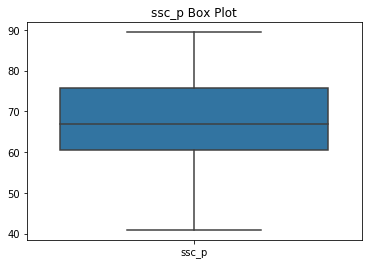

In [31]:
ssc = sns.boxplot(data= data3[['ssc_p']]).set_title("ssc_p Box Plot")

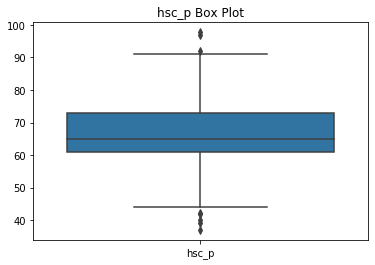

In [32]:
hsc = sns.boxplot(data= data3[['hsc_p']]).set_title("hsc_p Box Plot")

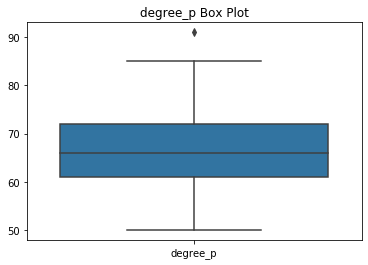

In [33]:
degree = sns.boxplot(data= data3[['degree_p']]).set_title("degree_p Box Plot")

## C. Continuous Independent Variables Are Linearly Related To The Log-Odds

In [34]:
# Needed to run the logistic regression
import statsmodels.formula.api as smf

# For plotting/checking assumptions
import seaborn as sns

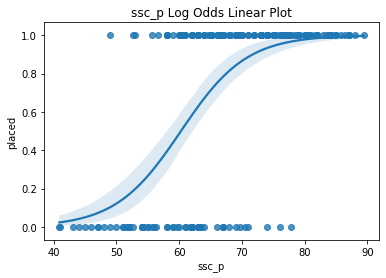

In [35]:
ssc = sns.regplot(x= 'ssc_p', y= 'placed', data= data3, logistic= True).set_title("ssc_p Log Odds Linear Plot")

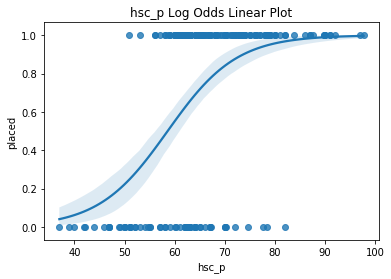

In [36]:
hsc = sns.regplot(x= 'hsc_p', y= 'placed', data= data3, logistic= True).set_title("hsc_p Log Odds Linear Plot")

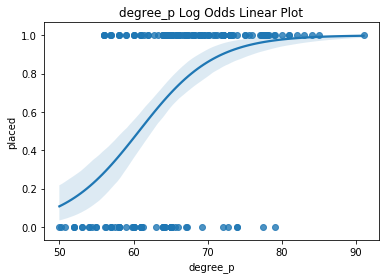

In [37]:
degree = sns.regplot(x= 'degree_p', y= 'placed', data= data3, logistic= True).set_title("degree_p Log Odds Linear Plot")

## Summary

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x3,y3,test_size=0.25)

In [39]:
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression()

In [40]:
model_3.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred= model_3.predict(x_test)
y_pred

array([0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1.])

In [42]:
model_3.score(x_train,y_train)

0.8571428571428571

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.15625

In [44]:
print('Slope :', model_3.coef_)

Slope : [[0.16826071 0.08474438 0.07196242 1.15599084]]


In [45]:
print('y_intercept:', model_3.intercept_)

y_intercept: [-20.26346966]


In [46]:
import statsmodels.formula.api as smf

In [47]:
model_4= smf.logit(formula="placed ~ ssc_p + hsc_p + degree_p + experience", data= data3).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.322049
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 placed   No. Observations:                  215
Model:                          Logit   Df Residuals:                      210
Method:                           MLE   Df Model:                            4
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.4809
Time:                        00:47:42   Log-Likelihood:                -69.240
converged:                       True   LL-Null:                       -133.39
Covariance Type:            nonrobust   LLR p-value:                 9.039e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.1266      3.209     -6.271      0.000     -26.417     -13.836
ssc_p          0.1414      0.031      4.609      0.000       0.081       0.202
hsc_p          0.0813      0.029      2.822      0.005       0.025       0.138
degree_p       0.0950      0.040      2.353      0.019       0.016       0.174
experience     1.6502      0.547      3.016      0.003       0.578       2.723
==============================================================================
"""

# Model Fitting

## I. Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test, y_pred)

array([[14,  8],
       [ 3, 29]], dtype=int64)

## II. Computation of Precision, Recall, F- measure and Support

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.64      0.72        22
         1.0       0.78      0.91      0.84        32

    accuracy                           0.80        54
   macro avg       0.80      0.77      0.78        54
weighted avg       0.80      0.80      0.79        54



## III. ROC Curve

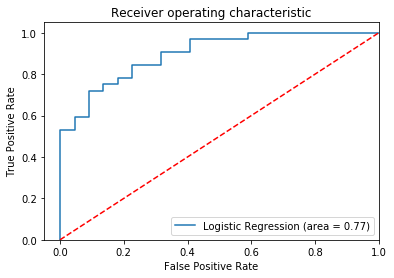

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model_3.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model_3.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.00, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()